In [1]:
import open3d as o3d
import numpy as np
import pandas as pd
#import functions as f
import matplotlib.pyplot as plt
#from scipy.interpolate import interp1d
import seqpc

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
facemocap_df = pd.read_pickle('facemocap_df.pkl')
facemocap_df.sample(10)

,File name,Original SPC,Name,Experimentator,MoCap platform,Pathology,Repetitive,Movement,Date
48,M5_1.csv,"[[263.819, -148.667, 1161.14, 239.641, -152.30...",VJ,Félix,IFF,Facial palsy,False,5,13-09-2022
97,JB01_Complet.csv,"[[-47.5335, 528.63, 665.976, -49.0075, 544.49,...",JB01,François-Régis,UTC,False,False,,13-05-2014
26,P2_D1_M5x10e3.csv,"[[-7.08149, 253.398, 644.389, -4.06434, 235.22...",NaN,Mattieu,UTC,Facial palsy,False,5,NaN
115,CR01_M2.csv,"[[70.3908, 67.7807, 1057.87, 59.8323, 90.7823,...",CR,François-Régis,UTC,False,False,2,NaN
2,M5.csv,"[[-47.4111, 293.794, 1110.16, -49.6079, 321.81...",LB,Félix,Unknown,Transplantation,False,5,18-04-2019
46,M4_5.csv,"[[270.146, -111.543, 1168.9, 244.835, -116.679...",VJ,Félix,IFF,Facial palsy,False,4,13-09-2022
241,P23_D1_M5x10e1.csv,"[[23.7016, 202.36, 570.434, 20.2984, 173.04, 5...",NaN,Mattieu,UTC,Facial palsy,False,5,NaN
534,P13_D1_M5x10e6.csv,"[[34.4557, 174.575, 598.356, 34.2113, 157.253,...",NaN,Mattieu,UTC,Facial palsy,False,5,NaN
134,TP01_M2.csv,"[[-78.8311, 432.535, 1274.13, -79.0076, 452.29...",TP01,François-Régis,UTC,False,False,2,12-05-2015
45,P18_D2_M5x10e5.csv,"[[78.4643, 178.706, 641.113, 76.8534, 174.735,...",NaN,Mattieu,UTC,Facial palsy,False,5,NaN


In [3]:
file_name = 'CR01_M5.csv'
Original_SPC = 'Original SPC'
scaled=False, 
interpolated=False
dental_support_frame=False
target_length=100
t = 50

In [4]:
spc, spc_array = seqpc.get_spc_from_df(facemocap_df, file_name, scaled=False, interpolated=False)

Dental support was removed


In [5]:
# Count nan values in spc_array[0]
print('Number of nan values in spc_array[0]:', np.count_nonzero(np.isnan(spc_array[0])))

Number of nan values in spc_array[0]: 3


In [6]:
spc_array

array([[[ 291.31 , -154.871, 1060.73 ],
        [ 286.835, -181.62 , 1042.25 ],
        [ 296.132, -181.734, 1070.74 ],
        ...,
        [ 187.318, -216.11 , 1148.27 ],
        [ 181.524, -155.344, 1158.26 ],
        [ 184.808, -152.451, 1150.12 ]],

       [[ 291.251, -154.885, 1060.75 ],
        [ 286.777, -181.631, 1042.27 ],
        [ 296.068, -181.751, 1070.76 ],
        ...,
        [ 187.226, -216.392, 1148.46 ],
        [ 181.449, -155.328, 1158.25 ],
        [ 184.664, -152.227, 1150.4  ]],

       [[ 291.166, -154.894, 1060.71 ],
        [ 286.69 , -181.637, 1042.23 ],
        [ 295.983, -181.76 , 1070.72 ],
        ...,
        [ 187.105, -216.743, 1148.79 ],
        [ 181.362, -155.288, 1158.22 ],
        [ 184.463, -151.942, 1150.85 ]],

       ...,

       [[ 290.788, -155.524, 1058.91 ],
        [ 286.134, -182.322, 1040.57 ],
        [ 295.717, -182.364, 1068.96 ],
        ...,
        [ 187.437, -216.572, 1148.63 ],
        [ 181.963, -155.709, 1157.6  ],
        [

In [7]:
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [8]:
# Load your dataset here
# Assuming your dataset is a 2D numpy array called 'point_cloud_data'
# with each row representing a point [x, y, z] in the point cloud
point_cloud_data = spc_array[0]

In [9]:
# Replace 'nan' values with numpy's NaN
point_cloud_data = np.where(point_cloud_data == 'nan', np.nan, point_cloud_data)


C:\Users\ederro\AppData\Local\Temp\ipykernel_22200\1522065535.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  point_cloud_data = np.where(point_cloud_data == 'nan', np.nan, point_cloud_data)


In [10]:
# Scale the data (optional, but can improve performance)
scaler = StandardScaler()
point_cloud_data_scaled = scaler.fit_transform(point_cloud_data)

In [11]:
# Impute missing values using KNN
k = 5  # Number of nearest neighbors to consider
imputer = KNNImputer(n_neighbors=k)
point_cloud_data_imputed_scaled = imputer.fit_transform(point_cloud_data_scaled)


In [12]:
# Inverse transform the scaled data back to original scale
point_cloud_data_imputed = scaler.inverse_transform(point_cloud_data_imputed_scaled)

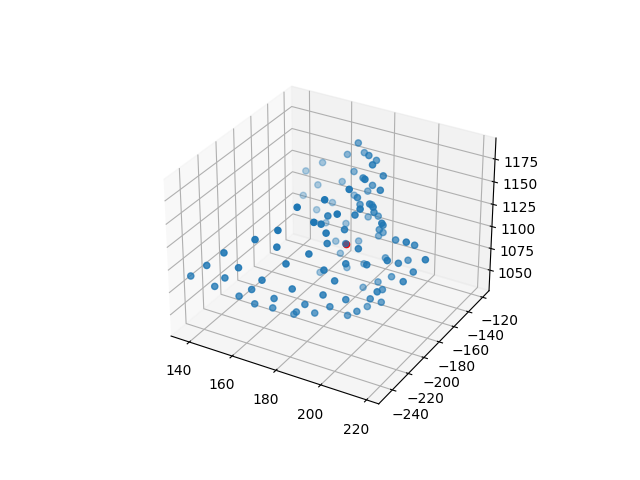

In [13]:
# Now 'point_cloud_data_imputed' contains the dataset with the missing values estimated using KNN
%matplotlib widget

pc = point_cloud_data_imputed
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc[3:, 0], pc[3:, 1], pc[3:, 2])
ax.scatter(pc[85, 0], pc[85, 1], pc[85, 2], c='r')
plt.show()


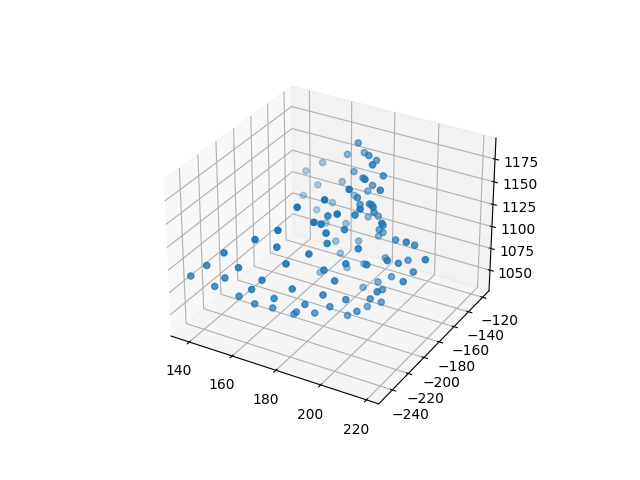

In [14]:
# Now 'point_cloud_data_imputed' contains the dataset with the missing values estimated using KNN
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(point_cloud_data[3:, 0], point_cloud_data[3:, 1], point_cloud_data[3:, 2])
plt.show()

In [25]:
# Count the nans in point_cloud_data
print('Number of nan values in point_cloud_data:', np.count_nonzero(np.isnan(point_cloud_data)))

# Find the index of nan values in point_cloud_data
nan_index = np.argwhere(np.isnan(point_cloud_data))
print('Index of nan values in point_cloud_data:', nan_index)

Number of nan values in point_cloud_data: 3
Index of nan values in point_cloud_data: [[85  0]
 [85  1]
 [85  2]]


In [24]:
# Count the nans in point_cloud_data_imputed
print('Number of nan values in point_cloud_data:', np.count_nonzero(np.isnan(point_cloud_data_imputed_scaled)))

Number of nan values in point_cloud_data: 0


In [15]:
pcd = o3d.geometry.PointCloud()
v3d = o3d.utility.Vector3dVector
pcd.points = v3d(point_cloud_data_imputed_scaled)
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: L’opération de transformation demandée n’est pas prise en charge. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: Descripteur non valide 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: L’opération de transformation demandée n’est pas prise en charge. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: Descripteur non valide 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: L’opération de transformation demandée n’est pas prise en charge. 


In [ ]:
# Estimate the missing value with respect to all the other markers in the csvs